# Проект. Формирование модели монетизации игрового приложения.

### Цели проекта:
 **- Подготовка модели монетизации приложения**  
 **- Проверка статистической значимости гипотез**   
 **- Определения влияние событи на целевое событие**  

Содержание:  

[1. Загрузка и обзор данных](#1)  
[2. Предобработка данных](#2)  
[3. EDA](#3)    
[4. Исследование влияний событий на целевое событие](#4)  
[5. Проверка гиотез](#5)  
[6. Общий расчет маркетинговых затрат](#6)  
[7. Когортный анализ](#7)  
[8. Выводы](#8)  

[Список ресурсов](#9)  
[Презентация](https://yadi.sk/i/t_gKetNqdwJtzg)   

<a id="1"></a>
## 1. Загрузка и обзор данных

In [106]:
#импорт необходимых библиотек
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from scipy import stats as st
from datetime import timedelta
import seaborn as sns
from matplotlib import pyplot as plt
import math

In [107]:
import warnings
warnings.filterwarnings('ignore')

In [108]:
#задаем путь
#path = 'C:/Users/rochev/Desktop/Яндекс/Final_project/'
path = 'C:/Users/HP250619/Desktop/Yandex/final_project/'

In [109]:
#импорт данных
user_source = pd.read_csv(path + 'user_source.csv', sep =",")
events = pd.read_csv(path + 'events.csv', sep =",")
ad_costs = pd.read_csv(path + 'ad_costs.csv', sep =",")

In [110]:
user_source

,user_id,source
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,facebook_ads
1,00151b4f-ba38-44a8-a650-d7cf130a0105,yandex_direct
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,youtube_channel_reklama
3,001d39dc-366c-4021-9604-6a3b9ff01e25,instagram_new_adverts
4,002f508f-67b6-479f-814b-b05f00d4e995,facebook_ads
...,...,...
13571,ffef4fed-164c-40e1-bde1-3980f76d0fb5,instagram_new_adverts
13572,fffab3da-da0e-4e30-ae62-10d0a2e24a4e,facebook_ads
13573,fffb626c-5ab6-47c9-8113-2062a2f18494,yandex_direct
13574,ffff194a-56b7-4c12-860d-3485242ae7f5,instagram_new_adverts


In [111]:
user_source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13576 entries, 0 to 13575
Data columns (total 2 columns):
user_id    13576 non-null object
source     13576 non-null object
dtypes: object(2)
memory usage: 212.2+ KB


In [112]:
events

,event_datetime,event,building_type,user_id,project_type
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN
...,...,...,...,...,...
135635,2020-06-05 00:08:06,building,research_center,f21d179f-1c4b-437e-b9c6-ab1976907195,NaN
135636,2020-06-05 02:25:12,finished_stage_1,NaN,515c1952-99aa-4bca-a7ea-d0449eb5385a,NaN
135637,2020-06-05 08:57:52,building,research_center,ed3e7d02-8a96-4be7-9998-e9813ff9c316,NaN
135638,2020-06-05 12:12:27,finished_stage_1,NaN,32572adb-900f-4b5d-a453-1eb1e6d88d8b,NaN


In [113]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135640 entries, 0 to 135639
Data columns (total 5 columns):
event_datetime    135640 non-null object
event             135640 non-null object
building_type     127957 non-null object
user_id           135640 non-null object
project_type      1866 non-null object
dtypes: object(5)
memory usage: 5.2+ MB


In [114]:
ad_costs

,source,day,cost
0,facebook_ads,2020-05-03,935.882786
1,facebook_ads,2020-05-04,548.354480
2,facebook_ads,2020-05-05,260.185754
3,facebook_ads,2020-05-06,177.982200
4,facebook_ads,2020-05-07,111.766796
5,facebook_ads,2020-05-08,68.009276
6,facebook_ads,2020-05-09,38.723350
7,instagram_new_adverts,2020-05-03,943.204717
8,instagram_new_adverts,2020-05-04,502.925451
9,instagram_new_adverts,2020-05-05,313.970984


In [115]:
ad_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
source    28 non-null object
day       28 non-null object
cost      28 non-null float64
dtypes: float64(1), object(2)
memory usage: 800.0+ bytes


<a id="2"></a>
## 2. Предобработка данных

##### проверим дубликаты

In [116]:

events.duplicated().sum()

1

In [117]:
ad_costs.duplicated().sum()

0

In [118]:
user_source.duplicated().sum()

0

In [119]:
events[events.duplicated(keep=False)]

,event_datetime,event,building_type,user_id,project_type
74890,2020-05-10 18:41:56,building,research_center,c9af55d2-b0ae-4bb4-b3d5-f32aa9ac03af,NaN
74891,2020-05-10 18:41:56,building,research_center,c9af55d2-b0ae-4bb4-b3d5-f32aa9ac03af,NaN


##### Имеем только один дубликат, поэтому мжем смело его удалить

In [120]:
events = events.drop_duplicates().reset_index(drop= True)

##### Проспуски есть, но мы их оставим, тк они связнаы с отсутствием действия у игрока. В датасетах ad_costs и user_source их нет.

<a id="3"></a>
## 3. EDA

In [121]:
#переведем даты в формат и извлечем дату
events['event_datetime']  = pd.to_datetime(events['event_datetime'])
events['date'] = events['event_datetime'].astype('datetime64[D]')

In [122]:
# рассмотрим датасет c типом проекта
pt = events[~events['project_type'].isna()]
pt.sample(5)

,event_datetime,event,building_type,user_id,project_type,date
131280,2020-05-21 04:27:17,project,NaN,6a8544be-d81f-4aa1-a3f9-48710afe7c4c,satellite_orbital_assembly,2020-05-21
95483,2020-05-13 03:03:29,project,NaN,adabe063-6688-4ed6-8703-e1ff451a68d9,satellite_orbital_assembly,2020-05-13
117538,2020-05-16 11:39:33,project,NaN,98c6226a-74c4-4e20-aab2-aa739b7ae7a6,satellite_orbital_assembly,2020-05-16
79891,2020-05-11 04:20:12,project,NaN,80ae43c8-d555-48ad-a63e-d5f13ecd23c0,satellite_orbital_assembly,2020-05-11
130843,2020-05-20 22:08:45,project,NaN,c40f2307-bd63-4bf2-941d-bad76b94bb92,satellite_orbital_assembly,2020-05-20


##### При указании типа обпроекта и событии проект тип здания не указывается

In [123]:
pt.building_type.unique()

array([nan], dtype=object)

In [124]:
# взглянем на варианты событий и их количество
events.event.value_counts()

building            127956
finished_stage_1      5817
project               1866
Name: event, dtype: int64

In [125]:
#начало рассматриваемого преиода
events['event_datetime'].min()

Timestamp('2020-05-04 00:00:01')

In [126]:
# окончание рассматриваемого периода
events['event_datetime'].max()

Timestamp('2020-06-05 12:32:49')

In [127]:
# посмотрим количество событий по игрокам
events.groupby(['user_id']).agg({'event':'count','building_type':'count' })

,event,building_type
user_id,,
0001f83c-c6ac-4621-b7f0-8a28b283ac30,13,13
00151b4f-ba38-44a8-a650-d7cf130a0105,9,9
001aaea6-3d14-43f1-8ca8-7f48820f17aa,4,4
001d39dc-366c-4021-9604-6a3b9ff01e25,9,8
002f508f-67b6-479f-814b-b05f00d4e995,12,12
...,...,...
ffef4fed-164c-40e1-bde1-3980f76d0fb5,10,9
fffab3da-da0e-4e30-ae62-10d0a2e24a4e,16,16
fffb626c-5ab6-47c9-8113-2062a2f18494,10,9


##### Взглянем выборочно на хронологии событий случайных игроков

In [128]:
# обхор хронологии одного игрока
events[events['user_id']=='e3c66498-9d45-4000-9392-f81e6796e7da']

,event_datetime,event,building_type,user_id,project_type,date
2196,2020-05-04 06:50:30,building,assembly_shop,e3c66498-9d45-4000-9392-f81e6796e7da,NaN,2020-05-04
3936,2020-05-04 11:58:16,building,spaceport,e3c66498-9d45-4000-9392-f81e6796e7da,NaN,2020-05-04
20206,2020-05-06 07:22:08,building,assembly_shop,e3c66498-9d45-4000-9392-f81e6796e7da,NaN,2020-05-06
20261,2020-05-06 07:31:59,building,assembly_shop,e3c66498-9d45-4000-9392-f81e6796e7da,NaN,2020-05-06
27376,2020-05-07 00:34:18,building,spaceport,e3c66498-9d45-4000-9392-f81e6796e7da,NaN,2020-05-07
31983,2020-05-07 10:52:16,building,assembly_shop,e3c66498-9d45-4000-9392-f81e6796e7da,NaN,2020-05-07
32956,2020-05-07 12:58:20,building,assembly_shop,e3c66498-9d45-4000-9392-f81e6796e7da,NaN,2020-05-07
33910,2020-05-07 14:58:20,building,assembly_shop,e3c66498-9d45-4000-9392-f81e6796e7da,NaN,2020-05-07
35308,2020-05-07 18:12:58,building,research_center,e3c66498-9d45-4000-9392-f81e6796e7da,NaN,2020-05-07
40433,2020-05-08 05:00:46,building,spaceport,e3c66498-9d45-4000-9392-f81e6796e7da,NaN,2020-05-08


In [129]:
events[events['user_id']=='d477dde8-7c22-4f23-9c4f-4ec31a1aa4c8']

,event_datetime,event,building_type,user_id,project_type,date
28129,2020-05-07 02:18:19,building,assembly_shop,d477dde8-7c22-4f23-9c4f-4ec31a1aa4c8,NaN,2020-05-07
56010,2020-05-09 11:16:42,building,spaceport,d477dde8-7c22-4f23-9c4f-4ec31a1aa4c8,NaN,2020-05-09
97183,2020-05-13 08:22:45,building,spaceport,d477dde8-7c22-4f23-9c4f-4ec31a1aa4c8,NaN,2020-05-13
105767,2020-05-14 12:29:33,building,spaceport,d477dde8-7c22-4f23-9c4f-4ec31a1aa4c8,NaN,2020-05-14
130673,2020-05-20 19:35:45,building,spaceport,d477dde8-7c22-4f23-9c4f-4ec31a1aa4c8,NaN,2020-05-20
135136,2020-05-27 01:08:21,building,spaceport,d477dde8-7c22-4f23-9c4f-4ec31a1aa4c8,NaN,2020-05-27
135211,2020-05-27 10:41:37,building,spaceport,d477dde8-7c22-4f23-9c4f-4ec31a1aa4c8,NaN,2020-05-27
135226,2020-05-27 13:18:46,building,spaceport,d477dde8-7c22-4f23-9c4f-4ec31a1aa4c8,NaN,2020-05-27
135402,2020-05-28 18:44:10,building,research_center,d477dde8-7c22-4f23-9c4f-4ec31a1aa4c8,NaN,2020-05-28
135422,2020-05-28 23:38:33,building,research_center,d477dde8-7c22-4f23-9c4f-4ec31a1aa4c8,NaN,2020-05-28


In [130]:
events[events['user_id']=='9d98001c-7e14-40d7-896e-46b3047365fd']

,event_datetime,event,building_type,user_id,project_type,date
35514,2020-05-07 18:38:47,building,assembly_shop,9d98001c-7e14-40d7-896e-46b3047365fd,NaN,2020-05-07
63396,2020-05-10 00:19:16,building,assembly_shop,9d98001c-7e14-40d7-896e-46b3047365fd,NaN,2020-05-10
99075,2020-05-13 14:18:40,building,spaceport,9d98001c-7e14-40d7-896e-46b3047365fd,NaN,2020-05-13
100527,2020-05-13 18:57:22,building,spaceport,9d98001c-7e14-40d7-896e-46b3047365fd,NaN,2020-05-13
110641,2020-05-15 06:29:57,building,spaceport,9d98001c-7e14-40d7-896e-46b3047365fd,NaN,2020-05-15
113874,2020-05-15 19:29:18,building,spaceport,9d98001c-7e14-40d7-896e-46b3047365fd,NaN,2020-05-15
128940,2020-05-19 21:37:21,building,spaceport,9d98001c-7e14-40d7-896e-46b3047365fd,NaN,2020-05-19
129544,2020-05-20 04:45:45,building,spaceport,9d98001c-7e14-40d7-896e-46b3047365fd,NaN,2020-05-20
132347,2020-05-22 00:08:38,building,research_center,9d98001c-7e14-40d7-896e-46b3047365fd,NaN,2020-05-22
133425,2020-05-23 04:28:14,building,spaceport,9d98001c-7e14-40d7-896e-46b3047365fd,NaN,2020-05-23


In [131]:
events[events['user_id']=='cdc6bb92-0ccb-4490-9866-ef142f09139d']

,event_datetime,event,building_type,user_id,project_type,date
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN,2020-05-04
2994,2020-05-04 09:08:39,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN,2020-05-04
12771,2020-05-05 12:28:36,building,spaceport,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN,2020-05-05
31185,2020-05-07 09:04:46,building,spaceport,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN,2020-05-07
65522,2020-05-10 03:56:03,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN,2020-05-10
75185,2020-05-10 19:10:46,building,spaceport,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN,2020-05-10
83282,2020-05-11 14:18:05,finished_stage_1,NaN,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN,2020-05-11


##### Хронология событий ясна: идет постройка, при завершении событие project и затем finished_stage_1, или сразу finished_stage_1, при победе над другим игроком.  
Могут встречатся аномалии когда после project идет достройка building и затем finished_stage_1

### 2.1 Группировки по событиям, по дням, по типу объекта

In [132]:
events.groupby('event').count()

,event_datetime,building_type,user_id,project_type,date
event,,,,,
building,127956,127956,127956,0,127956
finished_stage_1,5817,0,5817,0,5817
project,1866,0,1866,1866,1866


### 2.2 По событиям

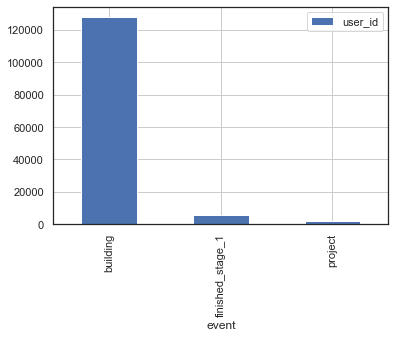

In [133]:
events.groupby('event').count().reset_index().plot(x = 'event', y= 'user_id', kind = 'bar', grid = True)
plt.show()

##### Видим, что закончило уровень всего 5817, из них реализацией проекта 1866, а всего было 127956 событий постройки

### По дням

In [134]:
events.groupby('date').count().reset_index().head(5)#.plot(x = 'date', y= 'user_id',  grid = True, figsize = (16,9))
#plt.show()

,date,event_datetime,event,building_type,user_id,project_type
0,2020-05-04,8171,8171,8170,8171,0
1,2020-05-05,9055,9055,9052,9055,0
2,2020-05-06,9925,9925,9921,9925,0
3,2020-05-07,10858,10858,10847,10858,0
4,2020-05-08,12059,12059,12030,12059,1


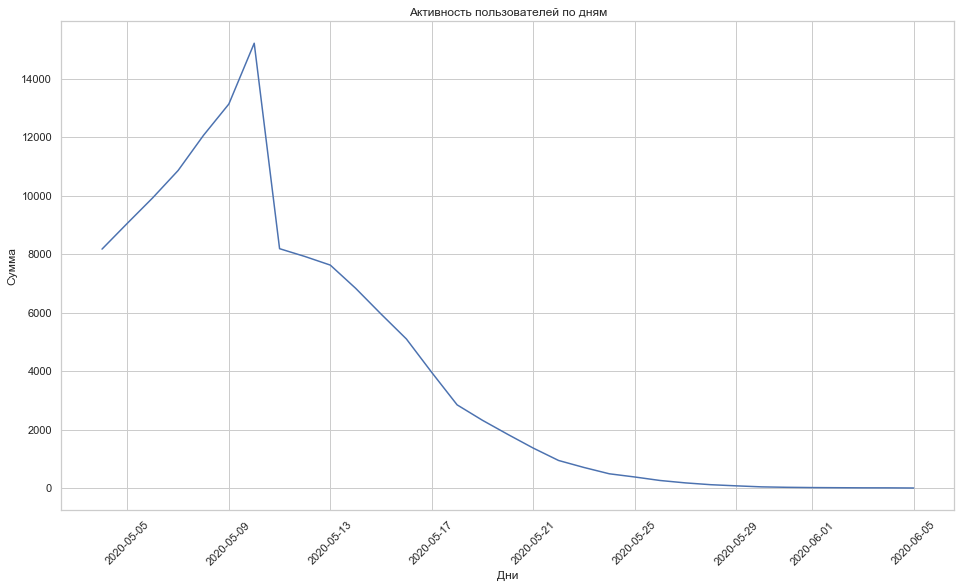

In [135]:
sns.set(style="whitegrid")
plt.figure(figsize=(16,9))
ax = sns.lineplot(x='date', y = 'user_id',  data=events.groupby('date').count().reset_index())
ax.set_ylabel('Сумма')
ax.set_xlabel('Дни')
ax.set_title('Активность пользователей по дням')
plt.xticks(rotation=45)
plt.show()

##### Видим, что пик посещений пришелся на 10.05 и далее пошел резкий спад

In [232]:
df = events.groupby(['date','event']).agg({'user_id':'count'}).reset_index()
df['date'] = df['date'].astype(str)

In [234]:
df1 = events.groupby(['date','building_type']).agg({'user_id':'count'}).reset_index()
df1['date'] = df1['date'].astype(str)
df1

,date,building_type,user_id
0,2020-05-04,assembly_shop,7767
1,2020-05-04,spaceport,403
2,2020-05-05,assembly_shop,7816
3,2020-05-05,spaceport,1236
4,2020-05-06,assembly_shop,7736
...,...,...,...
65,2020-06-03,research_center,3
66,2020-06-03,spaceport,4
67,2020-06-04,research_center,3
68,2020-06-04,spaceport,1


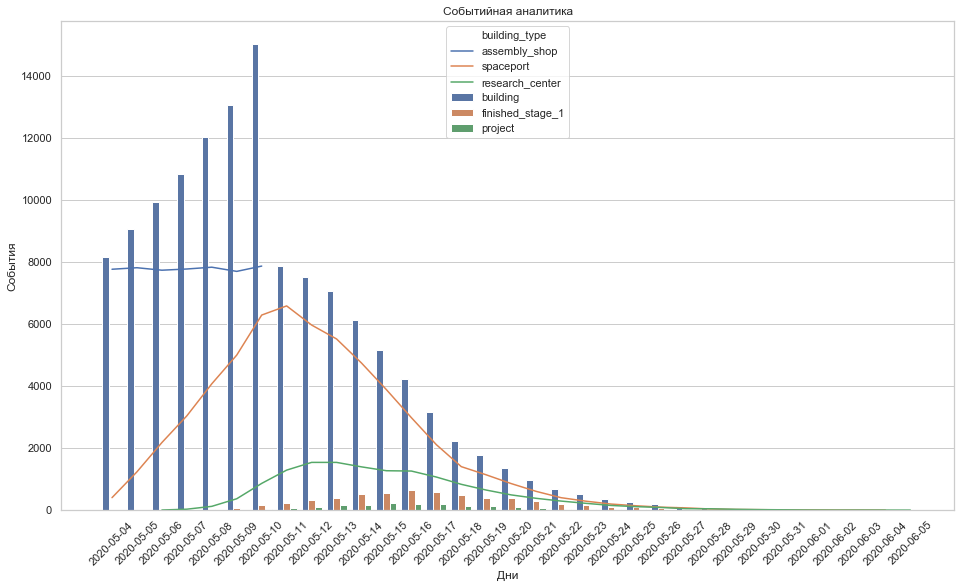

In [238]:
# рассмотрим события по дням
sns.set(style="whitegrid")
plt.figure(figsize=(16,9))
ax = sns.barplot(x='date', y = 'user_id', hue = 'event',   data=df)
sns.lineplot(x = 'date', y = 'user_id', hue = 'building_type', data = df1, ax = ax)
ax.set_ylabel('События')
ax.set_xlabel('Дни')
ax.set_title('Событийная аналитика')
plt.xticks(rotation=45)
plt.show()

#### Можно наблюдать совпадение количества событий с прекращением постройки assembly_shop, необходимо проверить корректность работы данного этапа

### По типу объекта

In [136]:
events.groupby('building_type').count()

,event_datetime,event,user_id,project_type,date
building_type,,,,,
assembly_shop,54494,54494,54494,0,54494
research_center,14137,14137,14137,0,14137
spaceport,59325,59325,59325,0,59325


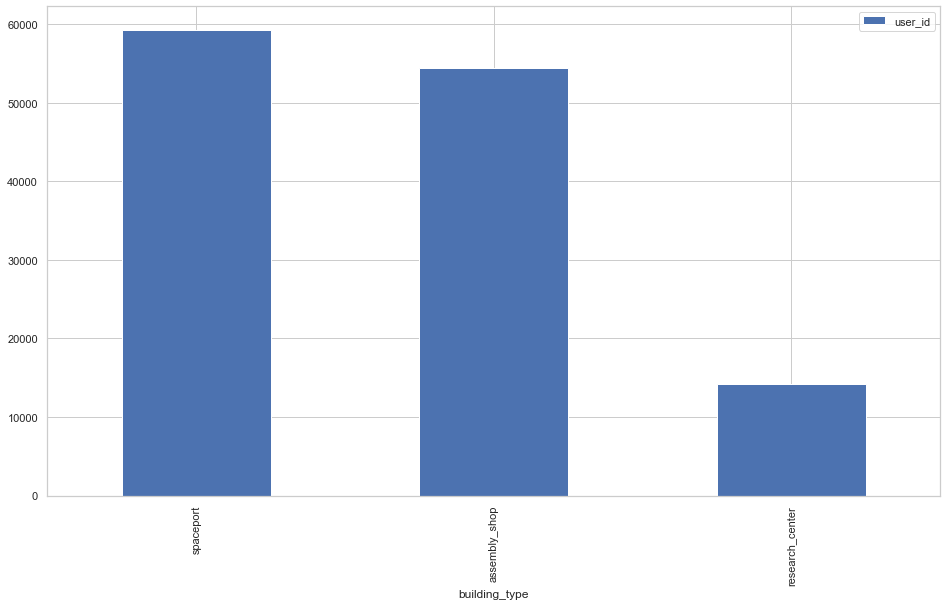

In [137]:
events.groupby('building_type').count().sort_values('user_id', ascending = False).reset_index().plot(x = 'building_type', y= 'user_id', kind = 'bar',  grid = True, figsize = (16,9))
plt.show()

##### Чаще всего строили spaceport, затем  assembly_shop и потом research_center	.

In [ ]:
st = s.melt(id_vars='source')

### Распределение по пользователям

In [138]:
user_grouped = events.groupby('user_id').count().sort_values('date', ascending = False)
user_grouped

,event_datetime,event,building_type,project_type,date
user_id,,,,,
d6aca06a-cd75-4cd8-b8cd-240a3c163884,22,22,20,1,22
ff841992-d93b-462e-bc6e-18c24a514f36,22,22,20,1,22
bf542075-e3a2-4e79-82d8-3838e86d2a25,22,22,20,1,22
45935e5d-8f50-4176-83d3-fd545bb2015f,21,21,19,1,21
94844e06-0352-4048-9e62-1db7718f804c,21,21,19,1,21
...,...,...,...,...,...
fcefbdaa-5f8b-49a6-91f3-8c09e0a94a5d,1,1,1,0,1
b9d266a0-7741-49ba-9125-134c5969f8d1,1,1,1,0,1
ded24248-15c7-4037-9092-f64fcaa651e7,1,1,1,0,1


In [139]:
user_grouped.describe()

,event_datetime,event,building_type,project_type,date
count,13576.000000,13576.000000,13576.000000,13576.000000,13576.000000
mean,9.991087,9.991087,9.425162,0.137448,9.991087
std,4.146133,4.146133,3.860800,0.344333,4.146133
min,1.000000,1.000000,1.000000,0.000000,1.000000
25%,6.000000,6.000000,6.000000,0.000000,6.000000
50%,10.000000,10.000000,10.000000,0.000000,10.000000
75%,13.000000,13.000000,12.000000,0.000000,13.000000
max,22.000000,22.000000,20.000000,1.000000,22.000000


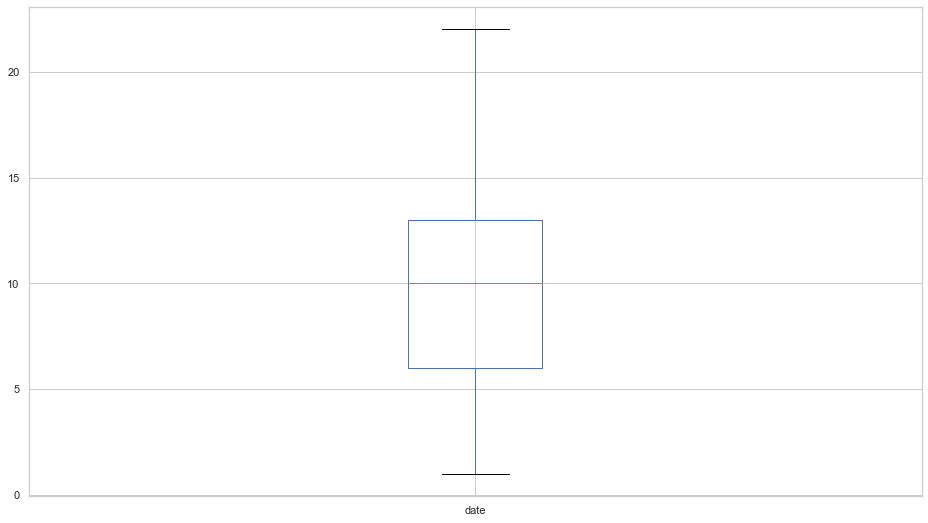

In [140]:
user_grouped.boxplot( column='date', figsize = (16,9))
plt.show()

### Все игроки играли от 1 до 22 сессий за исследуемый период? Медиана в р-не 10 раз

In [141]:
#считаем первую и последнюю сессию пользователя
user_time_all = events.groupby('user_id').agg({'event_datetime': ['min','max']}).reset_index()
user_time_all.columns = ['user_id','time_min','time_max']
user_time_all['gametime'] = user_time_all['time_max'] - user_time_all['time_min']
user_time_all['gametime'] = user_time_all['gametime'] / np.timedelta64(1,'D')
user_time_all['gametime'] = np.ceil(user_time_all['gametime']).astype('int')
user_time_all

,user_id,time_min,time_max,gametime
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,2020-05-06 01:07:37,2020-05-20 11:26:06,15
1,00151b4f-ba38-44a8-a650-d7cf130a0105,2020-05-06 03:09:12,2020-05-18 10:46:52,13
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,2020-05-05 18:08:52,2020-05-14 09:21:27,9
3,001d39dc-366c-4021-9604-6a3b9ff01e25,2020-05-05 21:02:05,2020-05-12 07:40:47,7
4,002f508f-67b6-479f-814b-b05f00d4e995,2020-05-05 13:49:58,2020-05-22 02:46:45,17
...,...,...,...,...
13571,ffef4fed-164c-40e1-bde1-3980f76d0fb5,2020-05-04 01:58:59,2020-05-11 22:15:54,8
13572,fffab3da-da0e-4e30-ae62-10d0a2e24a4e,2020-05-04 11:58:14,2020-05-14 10:11:36,10
13573,fffb626c-5ab6-47c9-8113-2062a2f18494,2020-05-04 02:05:09,2020-05-12 13:01:52,9
13574,ffff194a-56b7-4c12-860d-3485242ae7f5,2020-05-04 20:28:28,2020-05-11 22:04:30,8


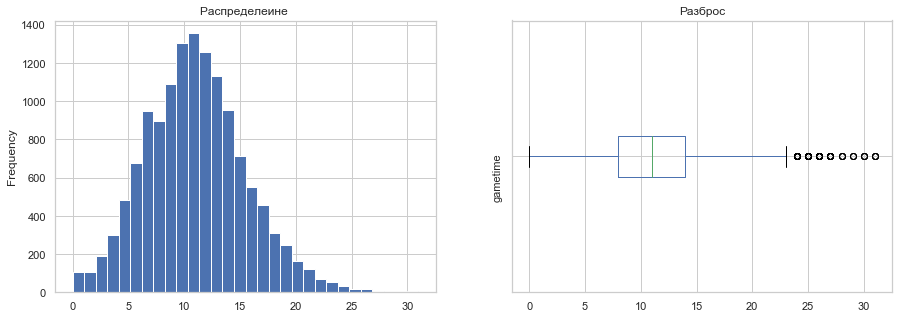

In [142]:
# посмотрим на распределения и разброс продолжительности прохождения уровня всех игроков
fig, axes = plt.subplots(1,2, figsize=(15,5))
user_time_all['gametime'].plot(ax=axes[0], kind = 'hist', grid = True, bins = 30,  title= 'Распределеине ' )
plt.title('Разброс')
user_time_all.boxplot('gametime', ax=axes[1], vert=False, rot = 90)
plt.show()

##### Чаще всего играли 11 дней

##### Сейчас рассмотрим количество показов всех экранов по игрокам

In [143]:
uid_events = events.groupby('user_id').agg({'event':'count'}).reset_index()
uid_events.columns = ['user_id','event_count']
uid_events

,user_id,event_count
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,13
1,00151b4f-ba38-44a8-a650-d7cf130a0105,9
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,4
3,001d39dc-366c-4021-9604-6a3b9ff01e25,9
4,002f508f-67b6-479f-814b-b05f00d4e995,12
...,...,...
13571,ffef4fed-164c-40e1-bde1-3980f76d0fb5,10
13572,fffab3da-da0e-4e30-ae62-10d0a2e24a4e,16
13573,fffb626c-5ab6-47c9-8113-2062a2f18494,10
13574,ffff194a-56b7-4c12-860d-3485242ae7f5,7


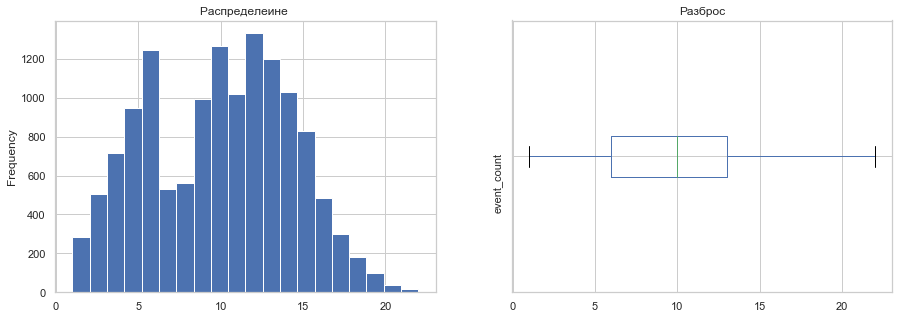

In [144]:
# посмотрим на распределения и разброс количества экранов для всех игроков

fig, axes = plt.subplots(1,2, figsize=(15,5))
uid_events['event_count'].plot(ax=axes[0], kind = 'hist', grid = True, bins = 20,  title= 'Распределеине ' )
plt.title('Разброс')
uid_events.boxplot('event_count', ax=axes[1], vert=False, rot = 90)
plt.show()

#### Чаще всего показыветеся 9 раз экран, в проц 25-75 значения от 6 до 12. Крайние выбросы 1 и 20.

### Подготовим данные для следующих этапов

In [145]:
#теперь добавим информацию о статусе прохождения уровня и о способе завершения
user_time = pd.merge(user_time_all, events[events['event'] == 'finished_stage_1'], how = 'left', on = 'user_id')
user_time = user_time[['user_id','time_min','time_max','gametime','event']]
user_time.head(3)

,user_id,time_min,time_max,gametime,event
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,2020-05-06 01:07:37,2020-05-20 11:26:06,15,NaN
1,00151b4f-ba38-44a8-a650-d7cf130a0105,2020-05-06 03:09:12,2020-05-18 10:46:52,13,NaN
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,2020-05-05 18:08:52,2020-05-14 09:21:27,9,NaN


In [146]:
# сделаем таблицу с теми кто прошел уровень
winner_time = user_time.query('event == event')
winner_time.head(3)

,user_id,time_min,time_max,gametime,event
3,001d39dc-366c-4021-9604-6a3b9ff01e25,2020-05-05 21:02:05,2020-05-12 07:40:47,7,finished_stage_1
6,003ee7e8-6356-4286-a715-62f22a18d2a1,2020-05-05 08:31:04,2020-05-17 21:47:49,13,finished_stage_1
7,004074f8-251a-4776-922c-8348dca1a2f6,2020-05-04 01:07:35,2020-05-16 19:57:40,13,finished_stage_1


In [147]:
#делаем датафрем с игроками построившими проект
win_type = events[events['project_type'] == 'satellite_orbital_assembly'][['user_id','event']].reset_index(drop = True)
win_type.columns = ['user_id','win_type']
win_type.head(2)

,user_id,win_type
0,e3c66498-9d45-4000-9392-f81e6796e7da,project
1,936e7af6-8338-4703-a1df-fc6c3f5b8e34,project


In [148]:
#таблица с типом победы
winner_time = winner_time.merge(win_type, on = 'user_id', how = 'left')

In [149]:
winner_time = winner_time.fillna('player')
winner_time.head(1)

,user_id,time_min,time_max,gametime,event,win_type
0,001d39dc-366c-4021-9604-6a3b9ff01e25,2020-05-05 21:02:05,2020-05-12 07:40:47,7,finished_stage_1,player


In [150]:
# добавим число экранов на игрока
winner_df = winner_time.merge(uid_events, on = 'user_id', how = 'left')

In [151]:
# оставляем только нужные столбцы
winner_df = winner_df[['user_id','win_type','gametime','event_count']]
winner_df['event_count'] = winner_df['event_count'].astype(int)
winner_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5817 entries, 0 to 5816
Data columns (total 4 columns):
user_id        5817 non-null object
win_type       5817 non-null object
gametime       5817 non-null int32
event_count    5817 non-null int32
dtypes: int32(2), object(2)
memory usage: 181.8+ KB


In [152]:
events_sp = events.merge(winner_df[['user_id','win_type']], how = 'left', on = 'user_id')
events_sp['win_type'] = events_sp['win_type'].fillna('inprogress')
events_sp['event_datetime'] = events_sp['event_datetime'].dt.date
events_sp.head(3)

,event_datetime,event,building_type,user_id,project_type,date,win_type
0,2020-05-04,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-04,inprogress
1,2020-05-04,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,2020-05-04,project
2,2020-05-04,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN,2020-05-04,player


<a id="4"></a>
## 4. Влияние событий на целевое событие

In [153]:
data = events_sp.groupby(['user_id','win_type']).agg({'event':'count'}).reset_index()
data 

,user_id,win_type,event
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,inprogress,13
1,00151b4f-ba38-44a8-a650-d7cf130a0105,inprogress,9
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,inprogress,4
3,001d39dc-366c-4021-9604-6a3b9ff01e25,player,9
4,002f508f-67b6-479f-814b-b05f00d4e995,inprogress,12
...,...,...,...
13571,ffef4fed-164c-40e1-bde1-3980f76d0fb5,player,10
13572,fffab3da-da0e-4e30-ae62-10d0a2e24a4e,inprogress,16
13573,fffb626c-5ab6-47c9-8113-2062a2f18494,player,10
13574,ffff194a-56b7-4c12-860d-3485242ae7f5,inprogress,7


In [154]:
data1 = data.groupby('win_type').agg({'event':'mean'}).reset_index()
data1

,win_type,event
0,inprogress,8.657043
1,player,10.411541
2,project,14.647910


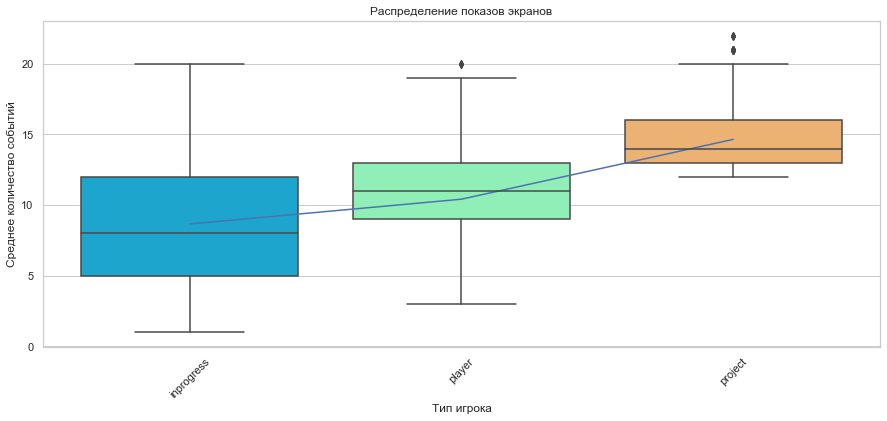

In [155]:
#распределеине показов экранов от типа завершенич уровня
fig, ax = plt.subplots(figsize = (15,6))
sns.boxplot(x='win_type', y = 'event',  data=data, palette = 'rainbow').set_title('Распределение показов экранов') 
sns.lineplot(x = data1['win_type'], y = data1['event'], ax = ax)
ax.set_xlabel('Тип игрока')
ax.set_ylabel('Среднее количество событий')
plt.xticks(rotation=45)
plt.show()

#### Больше всего экраны показывались в проектах, потом те кто победил игрока, те кто еще играет имеют приличный разброс, но медиану около 7 раз

In [156]:
# делаем срезы данных по типу событий и кол-ву игроков
us_project = events_sp[events_sp['win_type']=='project'].groupby('event_datetime').agg({'user_id':'nunique'}).reset_index()
us_player = events_sp[events_sp['win_type']=='player'].groupby('event_datetime').agg({'user_id':'nunique'}).reset_index()
us_progress = events_sp[events_sp['win_type']=='inprogress'].groupby('event_datetime').agg({'user_id':'nunique'}).reset_index()

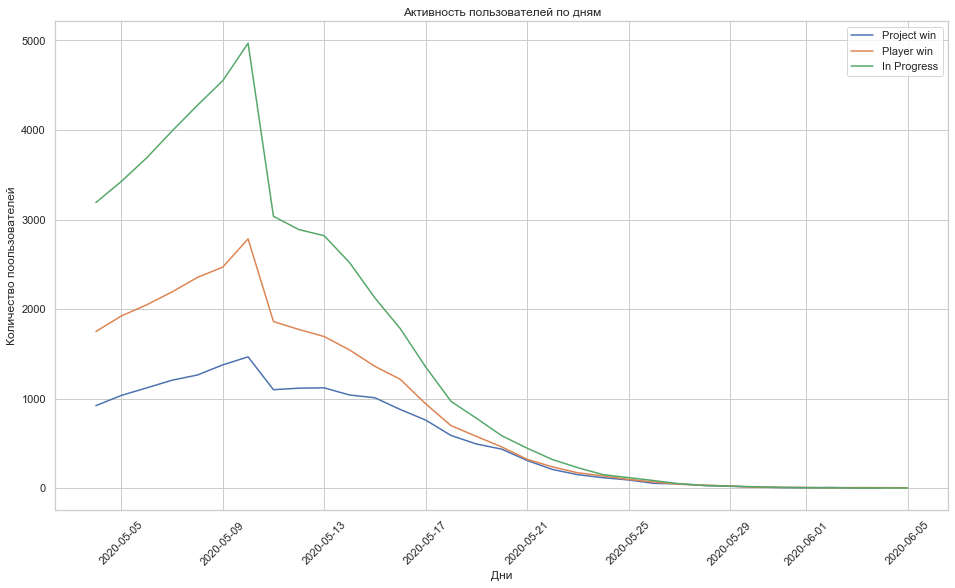

In [157]:
# график активности пользователей по дням в зависимости от статуса победы
plt.figure(figsize=(16,9))
ax = sns.lineplot(x='event_datetime', y = 'user_id',  data=us_project, label='Project win')
ax = sns.lineplot(x='event_datetime', y = 'user_id',  data=us_player, label='Player win')
ax = sns.lineplot(x='event_datetime', y = 'user_id',  data=us_progress, label='In Progress')
ax.set_ylabel('Количество поользователей')
ax.set_xlabel('Дни')
ax.set_title('Активность пользователей по дням')
#plt.legend('2','3','4')
plt.xticks(rotation=45)
plt.show()

#### Количество игроков по статусу уровня соответствует общему графику, больше всего игроков не завершивших уровень

In [158]:
# делаем срезы данных по типу событий и их кол-ву 
ev_project = events_sp[events_sp['win_type']=='project'].groupby('event_datetime').agg({'event':'count'}).reset_index()
ev_player = events_sp[events_sp['win_type']=='player'].groupby('event_datetime').agg({'event':'count'}).reset_index()
ev_progress = events_sp[events_sp['win_type']=='inprogress'].groupby('event_datetime').agg({'event':'count'}).reset_index()
ev_progress

,event_datetime,event
0,2020-05-04,4398
1,2020-05-05,4763
2,2020-05-06,5254
3,2020-05-07,5768
4,2020-05-08,6348
5,2020-05-09,6954
6,2020-05-10,7995
7,2020-05-11,4056
8,2020-05-12,3835
9,2020-05-13,3662


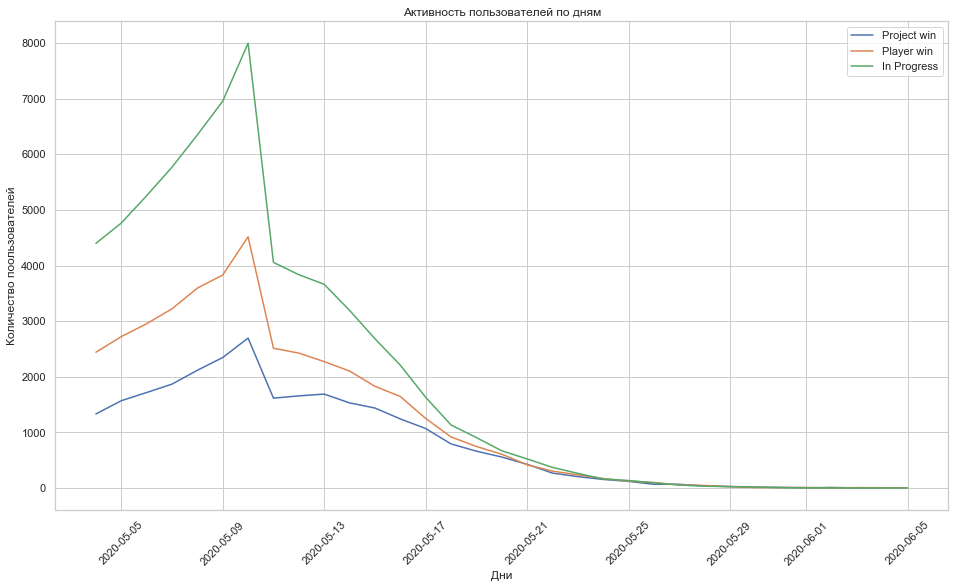

In [159]:
plt.figure(figsize=(16,9))
ax = sns.lineplot(x='event_datetime', y = 'event',  data=ev_project, label='Project win')
ax = sns.lineplot(x='event_datetime', y = 'event',  data=ev_player, label='Player win')
ax = sns.lineplot(x='event_datetime', y = 'event',  data=ev_progress, label='In Progress')
ax.set_ylabel('Количество поользователей')
ax.set_xlabel('Дни')
ax.set_title('Активность пользователей по дням')
#plt.legend('2','3','4')
plt.xticks(rotation=45)
plt.show()

#### События распределились анлогично пользователям

In [160]:
# сформируем данные по победителям проектом
winner_project = winner_df[winner_df['win_type']=='project']
# сформируем данные по победителем игрой
winner_player = winner_df[winner_df['win_type']=='player']

In [161]:
winner_project.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1866 entries, 7 to 5816
Data columns (total 4 columns):
user_id        1866 non-null object
win_type       1866 non-null object
gametime       1866 non-null int32
event_count    1866 non-null int32
dtypes: int32(2), object(2)
memory usage: 58.3+ KB


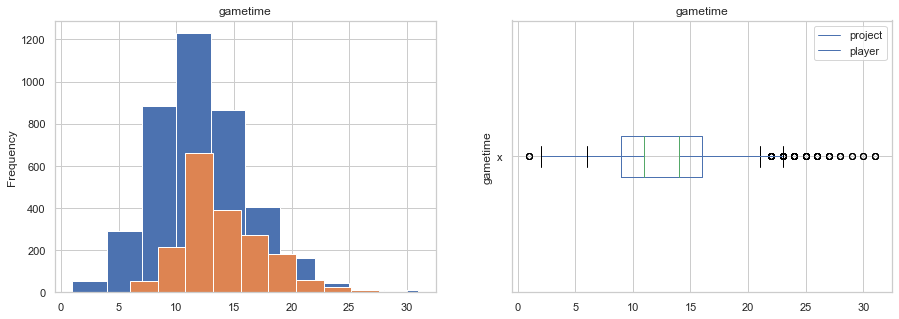

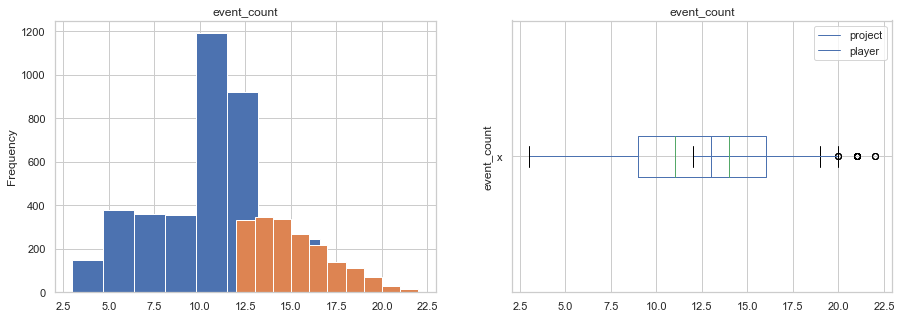

In [162]:
# рассмотрим гистограммы  по группам победителй по времени игры и по количеству показов
cols =['gametime','event_count']

for col in cols:
    fig, axes = plt.subplots(1,2, figsize=(15,5))
    plt.ylabel(col)
    plt.title(col)
    winner_player[col].plot( kind = 'hist', grid = True,  title= col, ax=axes[0] )
    winner_project[col].plot( kind = 'hist', grid = True, title= col, ax=axes[0] )
    pd.plotting.boxplot(winner_player[col], ax=axes[1], vert=False )
    pd.plotting.boxplot(winner_project[col], ax=axes[1], vert=False )
    plt.legend(('project','player'))
    plt.show

**Видим,что  время прохождения уровня распределяется примерно одинаково для обоих типов побед,
но количество экранов значительно смещено в сторону проектов.
Победителей над игроком заметно больше**

<a id="5"></a>
## 5. Проверка гипотез

## Проверим гипотезу: "Средняя время игры победой над игроком отличается от среднего времени игры победой проектом;  
и примем ее за альтернативную

Сформулируем нулевую гипотезу как " Средняя время игры победой над игроком одинакова для времени игры победой проектом"

In [163]:
#селаем необходимый срез данных и рассчитаем среднее время по группам
mean_project = winner_project['gametime']
mean_player = winner_player['gametime']

In [164]:
print('Среднее время победой проектом',mean_project.mean() )
print()
print('Среднее время победой над игроком',mean_player.mean() )

Среднее время победой проектом 13.963022508038586

Среднее время победой над игроком 11.606175651733738


In [165]:
#рассчитаем дисперсию
var_profit_project =np.var(mean_project, ddof=1)
var_profit_player =np.var(mean_player, ddof=1)
print('Дисперсия по проектам',var_profit_project,', а дисперсия по победителям над игроком',var_profit_player)


Дисперсия по проектам 12.437774023085622 , а дисперсия по победителям над игроком 16.86005299091099


# Расчитаем доверительный интервал для выборки

In [166]:
#функция расчета доверительного интервала
def compute_ci(sample):
    """Функция расчитывает доверительный интервал, в качестве аргумента необходимо внести массив по которому требуется расчеты"""
    st_dev = np.std(sample)
    z_value = st.norm.ppf(q=0.975)
    sample_size = len(sample)
    interval = z_value * (st_dev/np.sqrt(sample_size))
    conf_inv = (sample.mean() - interval, sample.mean() + interval)
    
    return conf_inv

In [167]:
#рассчитаем доверительный интервал по времени прохождения для общей таблицы
compute_ci(winner_df['gametime'])

(12.257365621064437, 12.467062778454213)

In [168]:
#рассчитаем доверительный интервал по времени прохождения для projects
compute_ci(winner_project['gametime'])

(13.803049319656951, 14.12299569642022)

In [169]:
#рассчитаем доверительный интервал по времени прохождения для projects
compute_ci(winner_player['gametime'])

(11.478158229848054, 11.734193073619421)

### По доверительному интервалу мы видим, что нормальное распределение лежит в достатаочно узком интервале, что подверждют большие значения дисперсии.

In [170]:
# Зададим критический уровень статистической значимости
alpha = 0.05    
# проверим гипотезу о равенстве средних двух независимых совокупностей, дисперсии выборок считаем не равными
results =  st.ttest_ind(
    mean_project, 
    mean_player, equal_var = False)

 # выведем на экран получившееся p-значение)
print('p-значение:', results.pvalue) 
# всравним получившееся p-значение с заданным уровнем статистической значимости
if (results.pvalue < alpha):  
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 2.6237027268062713e-106
Отвергаем нулевую гипотезу


### Полученное значение p-value говорит о том, что средний время прохождения уровня неодинаково. С вероятностью в ~ 0% такое различие можно получить случайно. Это явно достаточная вероятность, и мы можем сделать вывод о значимом различии между средним временем прохождения уровня разными способами.

## Проверим гипотезу: "Среднее количество показов экранов при победе над игроком отличается от среднего количества показов экранов победой проектом;  
и примем ее за альтернативную

Сформулируем нулевую гипотезу как " Среднее количество показов экранов победой над игроком одинаково для количества показов экранов победой проектом"

In [171]:
winner_player

,user_id,win_type,gametime,event_count
0,001d39dc-366c-4021-9604-6a3b9ff01e25,player,7,9
1,003ee7e8-6356-4286-a715-62f22a18d2a1,player,13,9
2,004074f8-251a-4776-922c-8348dca1a2f6,player,13,13
3,00464e5e-28ed-4be6-bf44-517ef7b3937b,player,12,9
4,0056c007-c082-43cc-bdef-afc49bca4cb9,player,7,4
...,...,...,...,...
5811,ffc6f4fa-3476-47af-85cb-e2ee0551110a,player,12,14
5812,ffd002f3-3545-423e-8dba-0c6a2d48a3aa,player,13,8
5813,ffe810f4-1a1f-464b-924d-6f120b0cb8df,player,14,17
5814,ffef4fed-164c-40e1-bde1-3980f76d0fb5,player,8,10


In [172]:
#селаем необходимый срез данных и рассчитаем среднее количество показов по группам
mean_screen_project = winner_project[['event_count']].reset_index(drop = True)
mean_screen_player = winner_player[['event_count']].reset_index(drop = True)

In [173]:
mean_screen_project.reset_index(drop = True)

,event_count
0,13
1,14
2,13
3,15
4,15
...,...
1861,20
1862,13
1863,15
1864,22


In [174]:
print('Среднее количество показов победой проектом',mean_screen_project.mean() )
print()
print('Среднее количество показов победой над игроком',mean_screen_player.mean() )

Среднее количество показов победой проектом event_count    14.64791
dtype: float64

Среднее количество показов победой над игроком event_count    10.411541
dtype: float64


In [175]:
#рассчитаем дисперсию
var_profit_screen_project =np.var(mean_screen_project, ddof=1)
var_profit_screen_player =np.var(mean_screen_player, ddof=1)
print('Дисперсия по проектам',var_profit_screen_project,', а дисперсия по победителям над игроком',var_profit_screen_player)

Дисперсия по проектам event_count    4.676502
dtype: float64 , а дисперсия по победителям над игроком event_count    9.360717
dtype: float64


Дисперсия значительно меньше, чем для времени игры

### Расчитаем доверительный интервал для выборки

#### рассчитаем доверительный интервалы

In [176]:
print('Доверительный интервал для всей выборки ', compute_ci(winner_df['event_count']))
print('Доверительный интервал для победы проектом ', compute_ci(winner_project['event_count']))
print('Доверительный интервал для победы игрой', compute_ci(winner_player['event_count']))

Доверительный интервал для всей выборки  (11.682352284162578, 11.858648231567178)
Доверительный интервал для победы проектом  (14.5498173223583, 14.74600261333302)
Доверительный интервал для победы игрой (10.316153286810149, 10.506929477047102)


Значения доверительного интервала очень малы, распеделения ненормальны

In [177]:
# Зададим критический уровень статистической значимости
alpha = 0.05    
# проверим гипотезу о равенстве средних двух независимых совокупностей, дисперсии выборок считаем не равными
results1 =  st.ttest_ind(
    mean_screen_project, 
    mean_screen_player, equal_var = False)

 # выведем на экран получившееся p-значение)
print('p-значение:', results1.pvalue) 
# всравним получившееся p-значение с заданным уровнем статистической значимости
if (results1.pvalue < alpha):  
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: [0.]
Отвергаем нулевую гипотезу


### Также отвергаем нулевую гипотезу, разница количества показов статистически подтверждена.

### Различие по времени игры и количеству показов экранов у победителей  уровня статистически подтверждено

<a id="6"></a>
## 6. Общий расчет маркетинговых затрат

In [178]:
# подготовим таблицу с активностью игроков
users_activity_all = pd.merge(user_time_all, uid_events, how = 'left', on = 'user_id')
users_activity_all['time_min'] = users_activity_all['time_min'].dt.date
users_activity_all['time_max'] = users_activity_all['time_max'].dt.date
users_activity_all.rename(columns={'time_min':'date_min','time_max':'date_max'}, inplace=True)
users_activity_all.head(5)

,user_id,date_min,date_max,gametime,event_count
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,2020-05-06,2020-05-20,15,13
1,00151b4f-ba38-44a8-a650-d7cf130a0105,2020-05-06,2020-05-18,13,9
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,2020-05-05,2020-05-14,9,4
3,001d39dc-366c-4021-9604-6a3b9ff01e25,2020-05-05,2020-05-12,7,9
4,002f508f-67b6-479f-814b-b05f00d4e995,2020-05-05,2020-05-22,17,12


In [179]:
# добавим источник привлечения
users = users_activity_all.merge(user_source, on = 'user_id')
users.head(3)

,user_id,date_min,date_max,gametime,event_count,source
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,2020-05-06,2020-05-20,15,13,facebook_ads
1,00151b4f-ba38-44a8-a650-d7cf130a0105,2020-05-06,2020-05-18,13,9,yandex_direct
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,2020-05-05,2020-05-14,9,4,youtube_channel_reklama


In [180]:
# посчитаем пользователей и их события по источникам
source = users.groupby('source').agg({'user_id':'nunique','event_count':'sum'}).reset_index()
source

,source,user_id,event_count
0,facebook_ads,2726,27672
1,instagram_new_adverts,3347,33757
2,yandex_direct,4817,47694
3,youtube_channel_reklama,2686,26516


In [181]:
# посчитаем сумму трат и источникам по дням
day_source = ad_costs.groupby(['day','source']).sum().reset_index().sort_values('cost', ascending = False)
day_source.head(5)

,day,source,cost
2,2020-05-03,yandex_direct,969.139394
1,2020-05-03,instagram_new_adverts,943.204717
0,2020-05-03,facebook_ads,935.882786
6,2020-05-04,yandex_direct,554.651494
4,2020-05-04,facebook_ads,548.354480


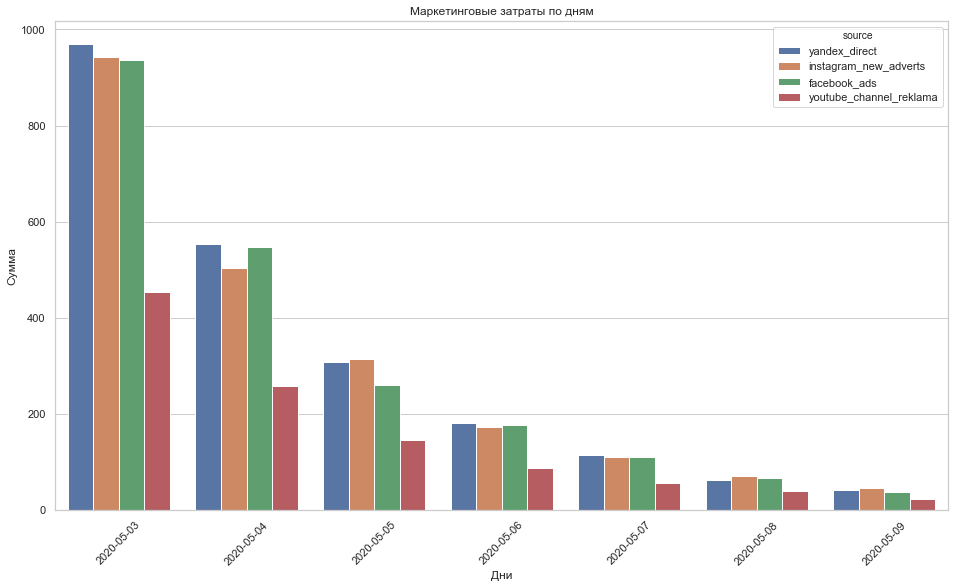

In [182]:
# рассмотрим затраты по дням
plt.figure(figsize=(16,9))
ax = sns.barplot(x='day', y = 'cost', hue = 'source',   data=day_source)
ax.set_ylabel('Сумма')
ax.set_xlabel('Дни')
ax.set_title('Маркетинговые затраты по дням')
plt.xticks(rotation=45)
plt.show()

#### Маркетинговые траты снижались от начала исследуемого периода, как и кол-во новых пользователей   



In [183]:
# распределение по источникам
source_cost = ad_costs.groupby('source').agg({'cost':'sum'}).reset_index()
source_cost

,source,cost
0,facebook_ads,2140.904643
1,instagram_new_adverts,2161.441691
2,yandex_direct,2233.111449
3,youtube_channel_reklama,1068.119204


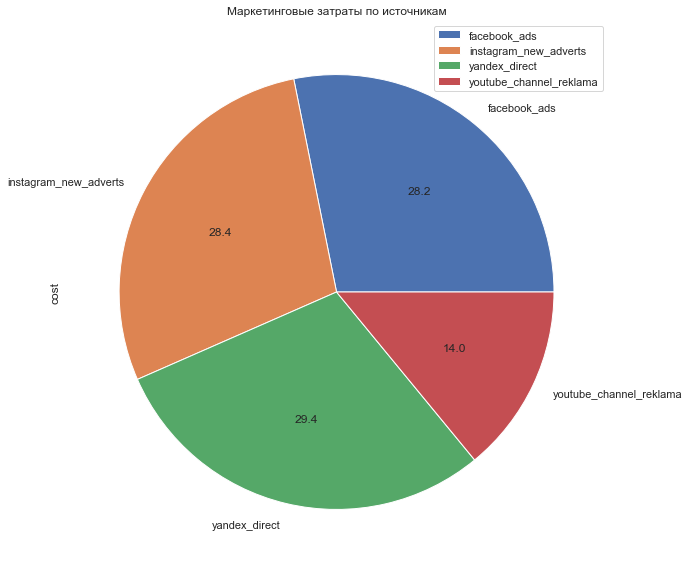

In [184]:
labels = source_cost['source']
source_cost.plot(y='cost', kind = 'pie', autopct='%.1f',  figsize = (10,10), 
         title = 'Маркетинговые затраты по источникам' ,
            labels = labels)
plt.show()

#### Три примерно равне части бюджета составлют Инст, Фейсбук и Яндекс, 14 % у Ютьюба

In [185]:
source = source.merge(source_cost, on = 'source')
source

,source,user_id,event_count,cost
0,facebook_ads,2726,27672,2140.904643
1,instagram_new_adverts,3347,33757,2161.441691
2,yandex_direct,4817,47694,2233.111449
3,youtube_channel_reklama,2686,26516,1068.119204


In [186]:
#посчитаем стоимость показа одного игрока, одного экрана и сколько раз нужно показывать экран, чтобы окупить стоимость
source['cost_screen'] = source['cost']/source['event_count']
source['user_cost'] = source['cost']/source['user_id']
source['scr_per_user'] = source['event_count']/source['user_id']
source

,source,user_id,event_count,cost,cost_screen,user_cost,scr_per_user
0,facebook_ads,2726,27672,2140.904643,0.077367,0.785365,10.151137
1,instagram_new_adverts,3347,33757,2161.441691,0.064029,0.645785,10.085748
2,yandex_direct,4817,47694,2233.111449,0.046822,0.463590,9.901183
3,youtube_channel_reklama,2686,26516,1068.119204,0.040282,0.397662,9.871929


In [187]:
avg_screen_cost = source['user_cost'].mean()/source['scr_per_user'].mean()
print('Среденее минимальная стоимость показа экрана для окупаемости: {:.2f}'.format(avg_screen_cost))

Среденее минимальная стоимость показа экрана для окупаемости: 0.06


### Это очень важное число, от него нужно опираться для определения стоимости показа рекламы

In [189]:
s = source[['source','cost_screen','user_cost']]

In [190]:
st = s.melt(id_vars='source')

In [191]:
st

,source,variable,value
0,facebook_ads,cost_screen,0.077367
1,instagram_new_adverts,cost_screen,0.064029
2,yandex_direct,cost_screen,0.046822
3,youtube_channel_reklama,cost_screen,0.040282
4,facebook_ads,user_cost,0.785365
5,instagram_new_adverts,user_cost,0.645785
6,yandex_direct,user_cost,0.463590
7,youtube_channel_reklama,user_cost,0.397662


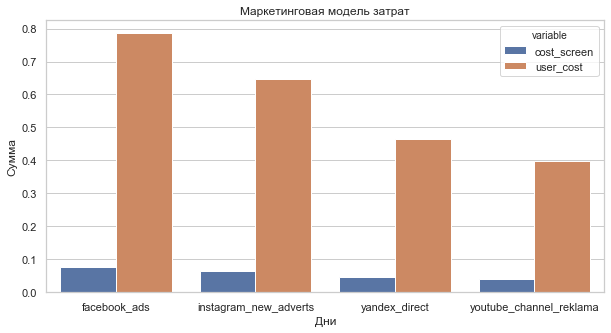

In [192]:
# график стоимости привлечения юзера и стоимость показа экрана 
plt.figure(figsize=(10,5))
ax = sns.barplot(x='source', y='value', hue='variable', data=st)
ax.set_ylabel('Сумма')
ax.set_xlabel('Дни')
ax.set_title('Маркетинговая модель затрат')
#plt.xticks(rotation=45)
plt.show()

Стоимость экрана составляет примерно 1/10 стоимости привлечения игроков при текущем состоянии приложения
т/е при расчете модели один новый игрок должен стоить не более дохода от 10 рекламных экранов. Или от обратного, реклама должна приносить не менее 1/10 стоимости привлечения нового игрока

<a id="7"></a>
## 7. Когортный анализ

In [193]:
#сделаем отдельный датафрейм с необходимой информацией
user_activity = events[['event_datetime','user_id']]
#приведем информацию о времени в формат datatime
user_activity['event_datetime'] = pd.to_datetime(user_activity['event_datetime'])

user_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135639 entries, 0 to 135638
Data columns (total 2 columns):
event_datetime    135639 non-null datetime64[ns]
user_id           135639 non-null object
dtypes: datetime64[ns](1), object(1)
memory usage: 2.1+ MB


In [194]:
#выделим первое время активности и добавим его в таблицу
first_activity_date = user_activity.groupby(['user_id'])['event_datetime'].min()
first_activity_date.name = 'first_session_date'
user_activity = user_activity.merge(first_activity_date,on='user_id')


In [195]:
# округлим до месяцев даты сессий
user_activity['first_session_date'] = user_activity['first_session_date'].astype('datetime64[D]')
user_activity['first_session_week'] = user_activity['first_session_date'].dt.week
user_activity['session_date'] = user_activity['event_datetime'].astype('datetime64[D]')
user_activity

,event_datetime,user_id,first_session_date,first_session_week,session_date
0,2020-05-04 00:00:01,55e92310-cb8e-4754-b622-597e124b03de,2020-05-04,19,2020-05-04
1,2020-05-05 05:20:15,55e92310-cb8e-4754-b622-597e124b03de,2020-05-04,19,2020-05-05
2,2020-05-05 19:24:02,55e92310-cb8e-4754-b622-597e124b03de,2020-05-04,19,2020-05-05
3,2020-05-05 20:59:19,55e92310-cb8e-4754-b622-597e124b03de,2020-05-04,19,2020-05-05
4,2020-05-06 00:52:56,55e92310-cb8e-4754-b622-597e124b03de,2020-05-04,19,2020-05-06
...,...,...,...,...,...
135634,2020-05-13 23:56:39,cafd1b8b-507b-49ae-abf0-89fe863a8b03,2020-05-10,19,2020-05-13
135635,2020-05-18 00:23:28,cafd1b8b-507b-49ae-abf0-89fe863a8b03,2020-05-10,19,2020-05-18
135636,2020-05-10 23:59:52,bdc53e19-462a-4dc3-8b55-b4a34278af6a,2020-05-10,19,2020-05-10
135637,2020-05-13 08:11:19,bdc53e19-462a-4dc3-8b55-b4a34278af6a,2020-05-10,19,2020-05-13


In [196]:
#найдем лайфтайм когорты
user_activity['cohort_lifetime'] = user_activity['session_date'] - user_activity['first_session_date']
user_activity['cohort_lifetime'] = user_activity['cohort_lifetime'] / np.timedelta64(1,'D')
user_activity['cohort_lifetime'] = user_activity['cohort_lifetime'].round().astype('int')
user_activity.sample(10)

,event_datetime,user_id,first_session_date,first_session_week,session_date,cohort_lifetime
98808,2020-05-05 23:52:12,ebe9f1ef-7122-4838-bde2-aefd140f3994,2020-05-05,19,2020-05-05,0
17796,2020-05-04 14:23:49,4223e42d-c885-4c64-a604-8a584163b9dc,2020-05-04,19,2020-05-04,0
10283,2020-05-10 07:13:45,221e7e5c-c383-4c93-909a-62f58bbdb8ca,2020-05-04,19,2020-05-10,6
62878,2020-05-19 14:11:11,77d97ab7-795c-4a10-9b24-e29ebdabd911,2020-05-04,19,2020-05-19,15
134187,2020-05-23 13:19:13,8ba7e4a9-4b4c-422b-9f2b-4b8ddaffa1e3,2020-05-10,19,2020-05-23,13
65267,2020-05-12 14:38:00,fd1fd00b-e610-46f7-9459-65cc0e8e3b05,2020-05-05,19,2020-05-12,7
52614,2020-05-10 13:04:55,bca1b0a3-cf1e-4735-99a5-7181d32bc66a,2020-05-04,19,2020-05-10,6
61817,2020-05-10 00:01:26,1d1cbbb8-cf16-46a8-b6d8-90c6501c5a21,2020-05-04,19,2020-05-10,6
82438,2020-05-09 22:18:59,8872d521-27c1-4326-8fb5-fe307fe5ea97,2020-05-05,19,2020-05-09,4
21578,2020-05-04 06:42:36,ae1b890c-39f7-4ef9-afae-34bf401c2b15,2020-05-04,19,2020-05-04,0


In [197]:
#создадим когорты
cohorts = user_activity.groupby(['first_session_week','cohort_lifetime']).agg({'user_id':'nunique'}).reset_index()
cohorts.head(5)

,first_session_week,cohort_lifetime,user_id
0,19,0,13576
1,19,1,6959
2,19,2,7335
3,19,3,7733
4,19,4,7891


In [198]:
#рассчитаем пользователей в нулевой период и добавим в таблицу
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_session_week','user_id']]
initial_users_count = initial_users_count.rename(columns={'user_id':'cohort_users'})
cohorts = cohorts.merge(initial_users_count,on='first_session_week')
cohorts.head(2)

,first_session_week,cohort_lifetime,user_id,cohort_users
0,19,0,13576,13576
1,19,1,6959,13576


### Получились все пользователи одной когорты

In [199]:
#Рассчитаем Retention Rate
cohorts['retention'] = cohorts['user_id']/cohorts['cohort_users']
#cohorts.loc[cohorts['cohort_lifetime'].isin(['1','7','11','20','30'])]
#df.loc[df['B'].isin(['one','three'])]
cohorts.head(2)

,first_session_week,cohort_lifetime,user_id,cohort_users,retention
0,19,0,13576,13576,1.000000
1,19,1,6959,13576,0.512596


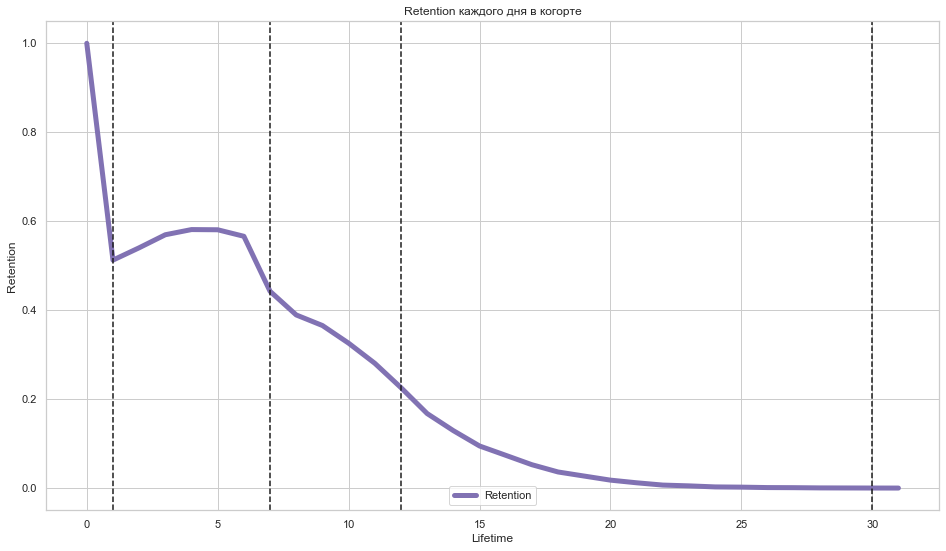

In [200]:
plt.figure(figsize=(16,9))
ax = sns.lineplot(x='cohort_lifetime', y = 'retention',   data=cohorts, label='Retention', color='m', linewidth=5)
lines = [1, 7, 12, 30]
for xc in lines:
    plt.axvline(x=xc, color='k', linestyle='--' )
ax.set_ylabel('Retention')
ax.set_xlabel('Lifetime')
ax.set_title('Retention каждого дня в когорте')
plt.show()

#### Подтверждаются графики по активности пользователей  
Видно резкое падение на 1 день, затем рост до 6 дня и почти линейное падение до 20 дня.

### Сколько стоило привлечение одного покупателя из каждого источника(CAC)?


In [201]:
events_sp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135639 entries, 0 to 135638
Data columns (total 7 columns):
event_datetime    135639 non-null object
event             135639 non-null object
building_type     127956 non-null object
user_id           135639 non-null object
project_type      1866 non-null object
date              135639 non-null datetime64[ns]
win_type          135639 non-null object
dtypes: datetime64[ns](1), object(6)
memory usage: 8.3+ MB


In [202]:
#таблица событий с источником игрока
events_sp = events.merge(user_source, on = 'user_id', how = 'left') 

In [203]:
# выделяем первый источник и дату прихода
first_source = events_sp.pivot_table(index = ['user_id','source'], values = 'date', aggfunc = 'min').reset_index()

In [204]:
# считаем количетсво юзеров оп дням из источников
count_source = first_source.pivot_table(index = ['source'], columns = 'date', values = 'user_id', aggfunc = 'count')
count_source

date,2020-05-04,2020-05-05,2020-05-06,2020-05-07,2020-05-08,2020-05-09,2020-05-10
source,,,,,,,
facebook_ads,1184,694,345,224,139,84,56
instagram_new_adverts,1452,796,472,270,175,112,70
yandex_direct,2078,1208,664,395,239,144,89
youtube_channel_reklama,1146,663,366,220,135,100,56


In [205]:
# построим таблицу с затратми на источники по месяцам
costs_pivot = ad_costs.pivot_table(index = 'source', columns = 'day', values = 'cost', aggfunc = 'sum')
costs_pivot

day,2020-05-03,2020-05-04,2020-05-05,2020-05-06,2020-05-07,2020-05-08,2020-05-09
source,,,,,,,
facebook_ads,935.882786,548.354480,260.185754,177.982200,111.766796,68.009276,38.723350
instagram_new_adverts,943.204717,502.925451,313.970984,173.071145,109.915254,71.578739,46.775400
yandex_direct,969.139394,554.651494,308.232990,180.917099,114.429338,62.961630,42.779505
youtube_channel_reklama,454.224943,259.073224,147.041741,88.506074,55.740645,40.217907,23.314669


In [206]:
#посчитаем затраты на привлечение каждого пользователя по месяцам
cost_by_client = costs_pivot/count_source
cost_by_client = cost_by_client.dropna(axis = 1)
#cost_by_client.reset_index()
cost_by_client

,2020-05-04,2020-05-05,2020-05-06,2020-05-07,2020-05-08,2020-05-09
source,,,,,,
facebook_ads,0.463137,0.374907,0.515890,0.498959,0.489275,0.460992
instagram_new_adverts,0.346367,0.394436,0.366676,0.407094,0.409021,0.417637
yandex_direct,0.266916,0.255160,0.272466,0.289695,0.263438,0.297080
youtube_channel_reklama,0.226067,0.221782,0.241820,0.253367,0.297910,0.233147


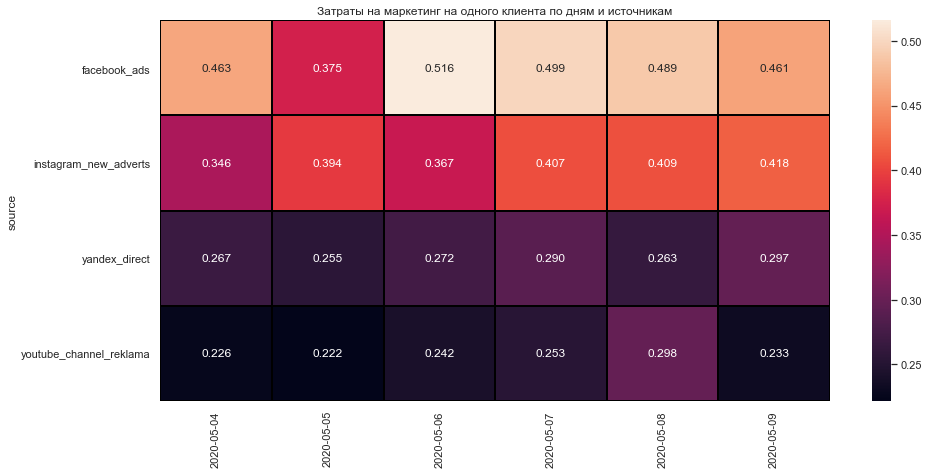

In [207]:
#создадим тепловю карту
sns.set(style='white')
plt.figure(figsize=(15, 7))
plt.title('Затраты на маркетинг на одного клиента по дням и источникам')
ax = sns.heatmap(cost_by_client, annot=True, fmt='.3f', linewidths=1, linecolor='Black')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.yticks(rotation=0) 
ax.set_xticklabels(labels = ['2020-05-04','2020-05-05','2020-05-06','2020-05-07','2020-05-08','2020-05-09'])
plt.show()


### Youtube и YandexДирект наиболее выгодные источники привлечения пользователей

#### Проверочка

In [208]:
if events.event.count()*0.06 > ad_costs.cost.sum():
    print('Модель работает:', events.event.count()*0.06,  '- расчетная выручка,', ad_costs.cost.sum(), 'Факт затраты' )
else:
          print('Считай заново')

Модель работает: 8138.34 - расчетная выручка, 7603.576986788022 Факт затраты


<a id="8"></a>
## Выводы

 - Хронология событий ясна: идет постройка, при завершении событие project и затем finished_stage_1, или сразу finished_stage_1, при победе над другим игроком.
Могут встречатся аномалии когда после project идет достройка building и затем finished_stage_1
 - Видим, что закончило уровень всего 5817, из них реализацией проекта 1866, всего игроков 13576 
 - Видим, что пик посещений пришелся на 10.05 и далее пошел резкий спад
 - Можно наблюдать совпадение количества событий с прекращением постройки assembly_shop, необходимо проверить корректность работы данного этапа
 - Чаще всего строили spaceport, затем assembly_shop и потом research_center 
 - Все игроки играли от 1 до 22 сессий за исследуемый период? Медиана в р-не 10 раз
 - Чаще всего играли 11 дней
 - Чаще всего показыветеся 9 раз экран, в проц 25-75 значения от 6 до 12. Крайние выбросы 1 и 20
 - Больше всего экраны показывались в проектах, потом те кто победил игрока, те кто еще играет имеют приличный разброс, но  медиану около 7 раз  
 - Количество игроков по статусу уровня соответствует общему графику, больше всего игроков не завершивших уровень
 - Время прохождения уровня распределяется примерно одинаково для обоих типов побед, но количество экранов значительно смещено в сторону проектов. Победителей над игроком заметно больше
 - Можем сделать вывод о значимом различии между средним временем прохождения уровня разными способами и количеством показов экрана
 - Маркетинговые траты снижались от начала исследуемого периода, как и кол-во новых пользователей
 - Три примерно равне части бюджета составлют Инст, Фейсбук и Яндекс, 14 % у Ютьюба
 - Среденее минимальная стоимость показа экрана для окупемости: **0.06**
 - Графики активности пользователей видно резкое падение на 1 день, затем рост до 6 дня и почти линейное падение до 20 дня.
 - Стоимость экрана составляет примерно 1/10 стоимости привлечения игроков при текущем состоянии приложения
 - Youtube и YandexДирект наиболее выгодные источники привлечения пользователей
 - **в целом, надежнее будет проверить корректность работы всех этапов и првести анализ "рабочей" когорты**